In [2]:
!pip install catboost

In [45]:
# importing necessary libaries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import xgboost as xgb
from catboost import CatBoostClassifier
import joblib
import matplotlib.pyplot as plt
from plotly import graph_objs as go
import seaborn as sns

In [4]:
# loading the dataset

df = pd.read_csv('DEALS PREDICT_NEW_check.csv')

## Exploratory Data Analysis

In [5]:
df.tail(10)

,S/N,DATE,NAME_OF_ENTITY,NATURE_OF_BUSINESS,BUSINESS_PROJECT,CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER,PROPOSED_FACILITY_AMOUNT,PURPOSE_OF_FACILITY,VALUE_CHAIN_CATEGORY,NAME_OF_BANK,...,SECURITY_PROPOSED,FEASIBILITY_STUDY_AVAILABLE,HIGHLIGHTS_OF_DISCUSSION,RM_BM_NAME_PHONE_NUMBER,RM_BM_EMAIL,STATUS_UPDATE,CHALLENGES,PROPOSED_NEXT_STEPS,STATE,TARGET
233,234,14/2/2024,"Jigawa state government, Ministry of Agricult...",Primary production: 40000 Wheat farming,EXISTING,OB10234,7.400000e+09,Primary Production 40000 hacters of wheat farm...,UPSTREAM,Afeican Develoment Bank,...,Jigawa state Government,YES,NIL,NIL,NIL,Awaiting prooosal from the NIRSAL HQ where th...,mantenance of time frame to meet up with the w...,The two parties should get a round table meeti...,JIGAWA,0
234,235,25/03/2024,MJD Global Vonvept,Selling of havy and light mechanization machi...,EXISTING,OB10235,2.000000e+08,Purchasing of havy and light farm mechanizatio...,PRE-UPSTREAM,Fidelity Bank,...,Company,YES,NIL,NIL,NIL,The bank show it commitment and further discus...,The banks are showing commitments at the branc...,Awaiting the higher response from the bank as ...,JIGAWA,0
235,236,25/03/2024,Alfaais Integrated Farm and Agro Allied Nig Ltd,Dairy and milk production,NEW,OB10236,2.000000e+08,To purchase pasteurisation and milking machine...,UPSTREAM,Jaiz Bank Plc,...,The farm certificate of occupancy,YES,NIL,NIL,NIL,The deal is active and under processing,The Bank is not communicating the progress of ...,Waiting for Bank approval,YOBE,0
236,237,28/03/2024,Maina Jamo Farms Ltd,Rice backward integration,EXISTING,OB10237,1.000000e+09,To purchase rice irrigation machineries and me...,UPSTREAM,Tajbank Plc,...,Rice milling factory,YES,NIL,NIL,NIL,This deal not active because the bank are not ...,The obligor only interested in CBN loans with ...,Meeting with the bank and the obligor,YOBE,0
237,238,28/03/2024,HASSAN GANYE ENTERPRESES,DEALER OF FERTILIZER,EXISTING,OB10238,9.000000e+08,TO FINANCE THE PUJRCHASE OF FERTLIZER,UPSTREAM,JAIZ BANK,...,25% EQUITY CONTRIBUTION AND NIRSAL GUARANTEE,YES,NIL,NIL,NIL,DISCUSSION IS ONGOING,DELAY FROM THE BANK,CONTINUE FOLLOWING UP WITH THE BANK,TARABA,1
238,239,31/03/2024,NOOR NGESA NIG LTD,RICE CULTIVATION,EXISTING,OB10239,2.000000e+08,TO FINANCE CULTIVATION OF RICE,UPSTREAM,JAIZ BANK,...,25% EQUITY CONTRIBUTION AND NIRSAL GUARANTEE,YES,NIL,NIL,NIL,DISCUSSION IS ONGOING,DELAY FROM THE BANK,CONTINUE FOLLOWING UP WITH THE BANK,TARABA,0
239,240,30/01/2024,ABS ZUGACHI,FERTILIZER FINANCING,EXISTING,OB10240,5.000000e+08,FERTILIZER PURCHASE,PRE-UPSTREAM,STERLING,...,EQUITY,NO,NIL,NIL,NIL,NaN,LOAN AMOUNT YET TO BE AGREED ON,WAITING TO HEAR FROM BANK,GOMBE,0
240,241,5/5/2024,Bauchi Meat Factory,Meat Processing,EXISTING,OB10241,3.000000e+09,working capital and reviving cold room and oth...,MIDSTREAM,Sterling Bank,...,Factory and 50% NIRSAL guarantee,YES,NIL,NIL,NIL,The bank had a fruitful discussion with bauchi...,High operational cost may be affect the daily ...,Negotiating with bank to consider lower intere...,BAUCHI,0
241,242,5/5/2024,ZAKWARAM BAFFA NIG LTD,POULTRY,EXISTING,OB10242,2.000000e+08,EXPANSION,UPSTREAM,STERLING,...,LANDED PROPERTY AND ISPO,NO,NIL,NIL,NIL,The official request were submitted yesterday.,Nil for now,waiting for the bank response.,BAUCHI,0
242,243,5/5/2024,BAUCHI FERTILIZER,FERTILIZER BLENDINFG,EXISTING,OB10243,5.000000e+09,EXPANSION,MIDSTREAM,STERLING,...,ISPO,NIL,NIL,NIL,NIL,formal request will be ready after sallah,interest rate and moratarium,to meet with the bank and company next sallah,BAUCHI,0


In [6]:
df.columns


Index(['S/N', 'DATE', 'NAME_OF_ENTITY', 'NATURE_OF_BUSINESS',
       'BUSINESS_PROJECT', 'CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER',
       'PROPOSED_FACILITY_AMOUNT', 'PURPOSE_OF_FACILITY',
       'VALUE_CHAIN_CATEGORY', 'NAME_OF_BANK', 'BORROWING_RELATIONSHIP',
       'FRESH_LOAN_REQUEST', 'REQUEST_SUBMITTED_TO_BANK', 'SECURITY_PROPOSED',
       'FEASIBILITY_STUDY_AVAILABLE', 'HIGHLIGHTS_OF_DISCUSSION',
       'RM_BM_NAME_PHONE_NUMBER', 'RM_BM_EMAIL', 'STATUS_UPDATE', 'CHALLENGES',
       'PROPOSED_NEXT_STEPS', 'STATE', 'TARGET'],
      dtype='object')

In [7]:
# short statistical description of dataset

df.describe

<bound method NDFrame.describe of      S/N        DATE          NAME_OF_ENTITY  \
0      1    1/2/2023                COM10001   
1      2    1/2/2023                COM10002   
2      3    1/2/2023                COM10003   
3      4    1/2/2023                COM10004   
4      5    1/2/2023                COM10005   
..   ...         ...                     ...   
238  239  31/03/2024      NOOR NGESA NIG LTD   
239  240  30/01/2024             ABS ZUGACHI   
240  241    5/5/2024    Bauchi Meat Factory    
241  242    5/5/2024  ZAKWARAM BAFFA NIG LTD   
242  243    5/5/2024       BAUCHI FERTILIZER   

                         NATURE_OF_BUSINESS BUSINESS_PROJECT  \
0                           RICE PROCESSING         EXISTING   
1    FERTILIZER DISTRIBUTION ACROSS ADAMAWA         EXISTING   
2                       BULL FEED FINISHING         EXISTING   
3                       BULL FEED FINISHING         EXISTING   
4                       BULL FEED FINISHING         EXISTING   
..   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S/N                                   243 non-null    int64  
 1   DATE                                  243 non-null    object 
 2   NAME_OF_ENTITY                        241 non-null    object 
 3   NATURE_OF_BUSINESS                    242 non-null    object 
 4   BUSINESS_PROJECT                      243 non-null    object 
 5   CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER  243 non-null    object 
 6   PROPOSED_FACILITY_AMOUNT              243 non-null    float64
 7   PURPOSE_OF_FACILITY                   240 non-null    object 
 8   VALUE_CHAIN_CATEGORY                  243 non-null    object 
 9   NAME_OF_BANK                          221 non-null    object 
 10  BORROWING_RELATIONSHIP                243 non-null    object 
 11  FRESH_LOAN_REQUEST 

In [9]:
df.isna().sum()

S/N                                      0
DATE                                     0
NAME_OF_ENTITY                           2
NATURE_OF_BUSINESS                       1
BUSINESS_PROJECT                         0
CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER     0
PROPOSED_FACILITY_AMOUNT                 0
PURPOSE_OF_FACILITY                      3
VALUE_CHAIN_CATEGORY                     0
NAME_OF_BANK                            22
BORROWING_RELATIONSHIP                   0
FRESH_LOAN_REQUEST                       0
REQUEST_SUBMITTED_TO_BANK                0
SECURITY_PROPOSED                       13
FEASIBILITY_STUDY_AVAILABLE              0
HIGHLIGHTS_OF_DISCUSSION                 1
RM_BM_NAME_PHONE_NUMBER                  1
RM_BM_EMAIL                              1
STATUS_UPDATE                           33
CHALLENGES                              73
PROPOSED_NEXT_STEPS                     43
STATE                                    3
TARGET                                   0
dtype: int6

## Feature Engineering

In [10]:
missing_categorical_columns = []

In [11]:
new_dict = dict(df.isna().sum())

In [12]:
new_dict


{'S/N': 0,
 'DATE': 0,
 'NAME_OF_ENTITY': 2,
 'NATURE_OF_BUSINESS': 1,
 'BUSINESS_PROJECT': 0,
 'CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER': 0,
 'PROPOSED_FACILITY_AMOUNT': 0,
 'PURPOSE_OF_FACILITY': 3,
 'VALUE_CHAIN_CATEGORY': 0,
 'NAME_OF_BANK': 22,
 'BORROWING_RELATIONSHIP': 0,
 'FRESH_LOAN_REQUEST': 0,
 'REQUEST_SUBMITTED_TO_BANK': 0,
 'SECURITY_PROPOSED': 13,
 'FEASIBILITY_STUDY_AVAILABLE': 0,
 'HIGHLIGHTS_OF_DISCUSSION': 1,
 'RM_BM_NAME_PHONE_NUMBER': 1,
 'RM_BM_EMAIL': 1,
 'STATUS_UPDATE': 33,
 'CHALLENGES': 73,
 'PROPOSED_NEXT_STEPS': 43,
 'STATE': 3,
 'TARGET': 0}

In [13]:
# figuring out features with missing features
for k,v in new_dict.items():
    if v != 0:
        missing_categorical_columns.append(k)

In [14]:
missing_categorical_columns

['NAME_OF_ENTITY',
 'NATURE_OF_BUSINESS',
 'PURPOSE_OF_FACILITY',
 'NAME_OF_BANK',
 'SECURITY_PROPOSED',
 'HIGHLIGHTS_OF_DISCUSSION',
 'RM_BM_NAME_PHONE_NUMBER',
 'RM_BM_EMAIL',
 'STATUS_UPDATE',
 'CHALLENGES',
 'PROPOSED_NEXT_STEPS',
 'STATE']

In [15]:
from typing import List
def fill_categorical_columns_with_mode(col_list: List[str]) -> None:
    """ function that fills categoical columns with missing values
    with the column mode values
    """

    for col in col_list:
        mode_c = df[col].mode()[0]
        df[col].fillna(mode_c, inplace=True)
    return


fill_categorical_columns_with_mode(missing_categorical_columns)


C:\Users\ogidan\AppData\Local\Temp\ipykernel_5240\3488712889.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_c, inplace=True)


In [16]:
df.isna().sum()

S/N                                     0
DATE                                    0
NAME_OF_ENTITY                          0
NATURE_OF_BUSINESS                      0
BUSINESS_PROJECT                        0
CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER    0
PROPOSED_FACILITY_AMOUNT                0
PURPOSE_OF_FACILITY                     0
VALUE_CHAIN_CATEGORY                    0
NAME_OF_BANK                            0
BORROWING_RELATIONSHIP                  0
FRESH_LOAN_REQUEST                      0
REQUEST_SUBMITTED_TO_BANK               0
SECURITY_PROPOSED                       0
FEASIBILITY_STUDY_AVAILABLE             0
HIGHLIGHTS_OF_DISCUSSION                0
RM_BM_NAME_PHONE_NUMBER                 0
RM_BM_EMAIL                             0
STATUS_UPDATE                           0
CHALLENGES                              0
PROPOSED_NEXT_STEPS                     0
STATE                                   0
TARGET                                  0
dtype: int64

In [17]:
df['BUSINESS_PROJECT']

0      EXISTING
1      EXISTING
2      EXISTING
3      EXISTING
4      EXISTING
         ...   
238    EXISTING
239    EXISTING
240    EXISTING
241    EXISTING
242    EXISTING
Name: BUSINESS_PROJECT, Length: 243, dtype: object

In [18]:
df.head()

,S/N,DATE,NAME_OF_ENTITY,NATURE_OF_BUSINESS,BUSINESS_PROJECT,CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER,PROPOSED_FACILITY_AMOUNT,PURPOSE_OF_FACILITY,VALUE_CHAIN_CATEGORY,NAME_OF_BANK,...,SECURITY_PROPOSED,FEASIBILITY_STUDY_AVAILABLE,HIGHLIGHTS_OF_DISCUSSION,RM_BM_NAME_PHONE_NUMBER,RM_BM_EMAIL,STATUS_UPDATE,CHALLENGES,PROPOSED_NEXT_STEPS,STATE,TARGET
0,1,1/2/2023,COM10001,RICE PROCESSING,EXISTING,OB10001,2.000000e+09,WORKING CAPITAL ENHANCEMENT,MIDSTREAM,FIDELITY BANK PLC,...,NIL,YES,NIL,NIL,NIL,WE AREAWAITING CREDIT COMMITY DECITION ON WEAT...,NONE,AWATING FEEDBACK FROM THE PROSPECT,ADAMAWA,1
1,2,1/2/2023,COM10002,FERTILIZER DISTRIBUTION ACROSS ADAMAWA,EXISTING,OB10002,5.000000e+07,WORKING CAPITAL ENHANCEMENT,PRE-UPSTREAM,FIDELITY BANK PLC,...,NIL,YES,NIL,NIL,NIL,WE ARE CURRENTLY WAITING FOR THE CLIENT TO CHO...,THE CLIENT IS ONLY WILLING TO DISTRIBUTE CRYST...,ONBOARD,ADAMAWA,1
2,3,1/2/2023,COM10003,BULL FEED FINISHING,EXISTING,OB10003,9.000000e+06,WORKING CAPITAL ENHANCEMENT,UPSTREAM,STANBIC IBTC,...,EQUITY CONTRIBUTION,YES,NIL,NIL,NIL,DOCUMENT YET TO BE PRESENTED,NIL,AWATING FEEDBACK FROM THE PROSPECT,ADAMAWA,1
3,4,1/2/2023,COM10004,BULL FEED FINISHING,EXISTING,OB10004,1.000000e+05,WORKING CAPITAL ENHANCEMENT,UPSTREAM,STANBIC IBTC,...,EQUITY CONTRIBUTION,YES,NIL,NIL,NIL,DOCUMENT YET TO BE PRESENTED,NIL,AWATING FEEDBACK FROM THE PROSPECT,ADAMAWA,0
4,5,1/2/2023,COM10005,BULL FEED FINISHING,EXISTING,OB10005,5.000000e+06,WORKING CAPITAL ENHANCEMENT,UPSTREAM,STANBIC IBTC,...,EQUITY CONTRIBUTION,YES,NIL,NIL,NIL,DOCUMENT YET TO BE PRESENTED,NIL,AWATING FEEDBACK FROM THE PROSPECT,ADAMAWA,1


In [19]:
# Encoding
categorical_x_features = ['BUSINESS_PROJECT', 'VALUE_CHAIN_CATEGORY',
                          'BORROWING_RELATIONSHIP', 'FRESH_LOAN_REQUEST',
                          'REQUEST_SUBMITTED_TO_BANK', 'FEASIBILITY_STUDY_AVAILABLE']

# Function to create encoder dictionaries
def encoder(feature: str) -> dict:
    """ Function that handles encoding """
    encoder_dict = {item: index for index, item in enumerate(df[feature].unique())}
    return encoder_dict

# Creating encoder dictionaries for each categorical feature
encoder_dicts = {feature: encoder(feature) for feature in categorical_x_features}

# Replace categorical values with their corresponding encodings
for feature, encoder_dict in encoder_dicts.items():
    df[feature] = df[feature].replace(encoder_dict)

C:\Users\ogidan\AppData\Local\Temp\ipykernel_5240\3311398906.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].replace(encoder_dict)


In [20]:
df['BUSINESS_PROJECT']

0      0
1      0
2      0
3      0
4      0
      ..
238    0
239    0
240    0
241    0
242    0
Name: BUSINESS_PROJECT, Length: 243, dtype: int64

In [21]:
print(encoder_dicts)

{'BUSINESS_PROJECT': {'EXISTING': 0, 'NEW  ': 1}, 'VALUE_CHAIN_CATEGORY': {'MIDSTREAM': 0, 'PRE-UPSTREAM': 1, 'UPSTREAM': 2, 'DOWNSTREAM': 3, 'UPSTREAM AND MIDSTREAM': 4, 'MIDSTREAM AND DOWNSTREAM': 5, 'UPSTREAM AND DOWNSTREAM': 6}, 'BORROWING_RELATIONSHIP': {'YES': 0, 'NO': 1}, 'FRESH_LOAN_REQUEST': {'YES': 0, 'NO': 1}, 'REQUEST_SUBMITTED_TO_BANK': {'YES': 0, 'NO': 1}, 'FEASIBILITY_STUDY_AVAILABLE': {'YES': 0, 'NO': 1, 'NIL': 2}}


In [22]:
# to be sure that the encoding was succesful
for i in categorical_x_features:
    print(df[i].unique())

[0 1]
[0 1 2 3 4 5 6]
[0 1]
[0 1]
[0 1]
[0 1 2]


In [23]:
df.head()

,S/N,DATE,NAME_OF_ENTITY,NATURE_OF_BUSINESS,BUSINESS_PROJECT,CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER,PROPOSED_FACILITY_AMOUNT,PURPOSE_OF_FACILITY,VALUE_CHAIN_CATEGORY,NAME_OF_BANK,...,SECURITY_PROPOSED,FEASIBILITY_STUDY_AVAILABLE,HIGHLIGHTS_OF_DISCUSSION,RM_BM_NAME_PHONE_NUMBER,RM_BM_EMAIL,STATUS_UPDATE,CHALLENGES,PROPOSED_NEXT_STEPS,STATE,TARGET
0,1,1/2/2023,COM10001,RICE PROCESSING,0,OB10001,2.000000e+09,WORKING CAPITAL ENHANCEMENT,0,FIDELITY BANK PLC,...,NIL,0,NIL,NIL,NIL,WE AREAWAITING CREDIT COMMITY DECITION ON WEAT...,NONE,AWATING FEEDBACK FROM THE PROSPECT,ADAMAWA,1
1,2,1/2/2023,COM10002,FERTILIZER DISTRIBUTION ACROSS ADAMAWA,0,OB10002,5.000000e+07,WORKING CAPITAL ENHANCEMENT,1,FIDELITY BANK PLC,...,NIL,0,NIL,NIL,NIL,WE ARE CURRENTLY WAITING FOR THE CLIENT TO CHO...,THE CLIENT IS ONLY WILLING TO DISTRIBUTE CRYST...,ONBOARD,ADAMAWA,1
2,3,1/2/2023,COM10003,BULL FEED FINISHING,0,OB10003,9.000000e+06,WORKING CAPITAL ENHANCEMENT,2,STANBIC IBTC,...,EQUITY CONTRIBUTION,0,NIL,NIL,NIL,DOCUMENT YET TO BE PRESENTED,NIL,AWATING FEEDBACK FROM THE PROSPECT,ADAMAWA,1
3,4,1/2/2023,COM10004,BULL FEED FINISHING,0,OB10004,1.000000e+05,WORKING CAPITAL ENHANCEMENT,2,STANBIC IBTC,...,EQUITY CONTRIBUTION,0,NIL,NIL,NIL,DOCUMENT YET TO BE PRESENTED,NIL,AWATING FEEDBACK FROM THE PROSPECT,ADAMAWA,0
4,5,1/2/2023,COM10005,BULL FEED FINISHING,0,OB10005,5.000000e+06,WORKING CAPITAL ENHANCEMENT,2,STANBIC IBTC,...,EQUITY CONTRIBUTION,0,NIL,NIL,NIL,DOCUMENT YET TO BE PRESENTED,NIL,AWATING FEEDBACK FROM THE PROSPECT,ADAMAWA,1


In [24]:
# splitting data
Y = df['TARGET']
X = df[['BUSINESS_PROJECT', 'VALUE_CHAIN_CATEGORY',
                          'BORROWING_RELATIONSHIP', 'FRESH_LOAN_REQUEST',
                          'REQUEST_SUBMITTED_TO_BANK', 'FEASIBILITY_STUDY_AVAILABLE', 'PROPOSED_FACILITY_AMOUNT']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=.2)

In [25]:
print(X)

     BUSINESS_PROJECT  VALUE_CHAIN_CATEGORY  BORROWING_RELATIONSHIP  \
0                   0                     0                       0   
1                   0                     1                       0   
2                   0                     2                       0   
3                   0                     2                       0   
4                   0                     2                       0   
..                ...                   ...                     ...   
238                 0                     2                       0   
239                 0                     1                       0   
240                 0                     0                       0   
241                 0                     2                       0   
242                 0                     0                       0   

     FRESH_LOAN_REQUEST  REQUEST_SUBMITTED_TO_BANK  \
0                     0                          0   
1                     0                

## Model Selection and Training

In [26]:
# using xgboost algorithm
xgboost = xgb.XGBClassifier()

In [27]:
xgboost_model = xgboost.fit(x_train, y_train)

In [28]:
xgb_prediction = xgboost_model.predict(x_test)

In [29]:
accuracy_score(xgb_prediction, y_test)

0.8163265306122449

In [30]:
# saving the model
joblib.dump(xgboost_model, 'xgboost.joblib')

['xgboost.joblib']

In [31]:
# loading the model
loaded_model = joblib.load('xgboost.joblib')

In [32]:
loaded_model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0])

In [33]:
# using catboost algorithm

In [34]:
catboost = CatBoostClassifier()

In [35]:
catboost_model = catboost.fit(x_train, y_train)

Learning rate set to 0.005115
0:	learn: 0.6868552	total: 198ms	remaining: 3m 17s
1:	learn: 0.6802886	total: 200ms	remaining: 1m 39s
2:	learn: 0.6761408	total: 202ms	remaining: 1m 7s
3:	learn: 0.6701067	total: 203ms	remaining: 50.7s
4:	learn: 0.6650490	total: 205ms	remaining: 40.9s
5:	learn: 0.6604058	total: 207ms	remaining: 34.4s
6:	learn: 0.6549036	total: 209ms	remaining: 29.7s
7:	learn: 0.6495795	total: 211ms	remaining: 26.1s
8:	learn: 0.6447565	total: 213ms	remaining: 23.4s
9:	learn: 0.6406697	total: 215ms	remaining: 21.2s
10:	learn: 0.6379284	total: 216ms	remaining: 19.5s
11:	learn: 0.6322495	total: 218ms	remaining: 18s
12:	learn: 0.6276812	total: 220ms	remaining: 16.7s
13:	learn: 0.6235582	total: 222ms	remaining: 15.6s
14:	learn: 0.6190993	total: 224ms	remaining: 14.7s
15:	learn: 0.6150655	total: 226ms	remaining: 13.9s
16:	learn: 0.6125769	total: 228ms	remaining: 13.2s
17:	learn: 0.6085344	total: 230ms	remaining: 12.5s
18:	learn: 0.6046396	total: 232ms	remaining: 12s
19:	learn: 0.

In [36]:
catboost_prediction = catboost_model.predict(x_test)

In [37]:
accuracy_score(catboost_prediction, y_test)

0.7959183673469388

Confusion Matrix:
[[37  4]
 [ 5  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.43      0.38      0.40         8

    accuracy                           0.82        49
   macro avg       0.65      0.64      0.65        49
weighted avg       0.81      0.82      0.81        49



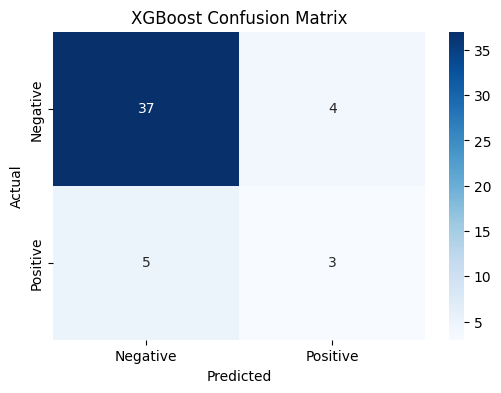

In [48]:
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)
# y_pred = rf_model.predict(X_test)

# accuracy_score(xgb_prediction, y_test)

# Evaluate the model with a confusion matrix and classification report
xgb_conf_matrix = confusion_matrix(y_test, xgb_prediction)
classification_rep = classification_report(y_test, xgb_prediction)
print("Confusion Matrix:")
print(xgb_conf_matrix)
print("\nClassification Report:")
print(classification_rep)
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.savefig('model2.png')
plt.show()


# xgboost.fit(x_train, y_train)

In [ ]:
joblib.dump(catboost_model, 'catboost.joblib')

In [ ]:
df.head(5)